Run in python 3 kernel and not qudi for pyqtgraph plot 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
plt.style.use('seaborn')

QControl parameterisation

Q Factor:  2298.0


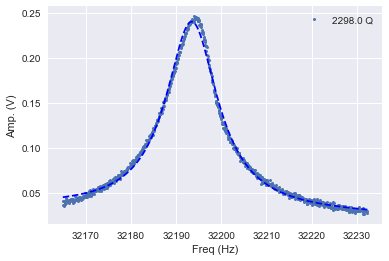

In [3]:
from lmfit import Model
from lmfit.models import GaussianModel, ConstantModel
import matplotlib.pyplot as plt
from lmfit.models import LinearModel, LorentzianModel, PseudoVoigtModel, SkewedGaussianModel, VoigtModel, DonaichModel
fname = f"D:\\Data\\Daisy_Data\\CA_003-ca_1-Calibration Amplitude.csv"

data = np.loadtxt(fname, skiprows=7, delimiter=";")
# print(data)
n = len(data[0,:])-1
x = data[:,0]

%gui qt5
from PyQt5.Qt import QApplication

# start qt event loop
_instance = QApplication.instance()
if not _instance:
    _instance = QApplication([])
app = _instance

import pyqtgraph as pg

# create and and set layout
view = pg.GraphicsView()   
view.setWindowTitle('Your title')
layout = pg.GraphicsLayout()
view.setCentralItem(layout)
# view.show() # uncomment for interactive plot

# Set white graph
pg.setConfigOptions(antialias=True)
pg.setConfigOption('background', 'w')
pg.setConfigOption('foreground', 'k')
pyqt_plot_obj = []

for i in range(n):
    y = data[:,i+1]
    xval = np.array(x)
    yval = np.array(y)

    peak = LorentzianModel()
#     peak = SkewedGaussianModel()
    #peak = VoigtModel()
    offset = LinearModel()
    model = peak + offset

    pars = offset.make_params(c=np.min(y))
    amp_guess = np.max(y)-np.min(y)
    center_guess = xval[np.argmax(yval)]
    pars += peak.guess(yval, x=xval)#, amplitude=amp_guess, center=center_guess)
#     pars['amplitude'].set(value=amp_guess, vary=True, expr='')
    pars['center'].set(value=center_guess, vary=True, expr='')

    result = model.fit(yval, pars, x=xval)
#     print(result.fit_report())
    qf = result.params['center']/result.params['fwhm']
    plt.plot(xval, yval, 'o', ms=3, label=f'{round(qf,0)} Q')
    
    plt.plot(xval, result.best_fit, 'b--')
    tip_name='P-P19-16'
    date=time.strftime(' %d/%m/%y')
    #plt.title('$A_{exc}$ = 913mV,800m - 3.12V,901m - 3.06V,904m - 3.06V,904m at 161deg QC Phase'+f'\n{tip_name} on {date}')
#     plt.title('$A_{exc}$ = 197mV'+f'\n{tip_name} in cryostat 2K on {date}')
#     plt.title('$A_{exc}$ = 32mV, -20dB, 180deg 946m QControl False'+f'\n{tip_name} in cryostat 2K on {date}')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('Amp. (V)')
    plt.legend()

    print("Q Factor: ", round(qf,0))

    # add subplots for interactive plots
    pyqt_plot_obj.append(layout.addPlot(i,0))
    pyqt_plot_obj[i].addLegend()
    pyqt_plot_obj[i].plot(xval, yval, name=f'p{i}')

Raw: 975Q - 245mV

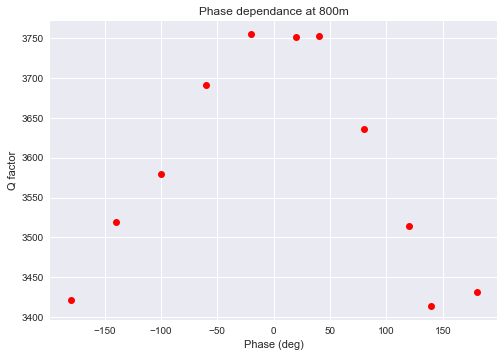

In [148]:
# 'Off': 'CA_004-ca_1',
d = {
     '-180,833': 'CA_005-ca_1',
    '-140,833': 'CA_006-ca_1',
    '-100,833': 'CA_007-ca_1',
    '-60,833': 'CA_008-ca_1',
    '-20,833': 'CA_009-ca_1',
    '20,833': 'CA_010-ca_1',
    '40,833': 'CA_011-ca_1',
    '80,833': 'CA_012-ca_1',
    '120,833': 'CA_013-ca_1',
    '140,833': 'CA_014-ca_1',
    '180,833': 'CA_015-ca_1'}
phase = [-180,
-140,
-100,
-60,
-20,
20,
40,
80,
120,
140,
180]
qs = []

for key in d:
    file = d[key]
    fname = f"G:\\Data\\AFM_Daisy\\{file}.csv"

    data = np.loadtxt(fname, skiprows=7, delimiter=";")
    x,y = (data[:,0], data[:,1])

    from lmfit import Model
    from lmfit.models import GaussianModel, ConstantModel
    import matplotlib.pyplot as plt
    from lmfit.models import LinearModel, LorentzianModel, DampedOscillatorModel, SkewedGaussianModel

    xval = np.array(x)
    yval = np.array(y)

    peak = LorentzianModel()
    # peak = SkewedGaussianModel()
    offset = LinearModel()
    model = peak + offset

    pars = offset.make_params(c=np.median(y))
    amp_guess = np.max(y)-np.mean(y)
    pars += peak.guess(yval, x=xval, amplitude=amp_guess)

    result = model.fit(yval, pars, x=xval)
    # print(result.fit_report())
    qs.append(result.params['center']/result.params['fwhm'])
plt.plot(phase, qs, 'ro')
plt.title('Phase dependance at 800m')
plt.xlabel('Phase (deg)')
plt.ylabel('Q factor')
plt.show()